## Introduction
This notebook will use **[Wine data](https://archive.ics.uci.edu/ml/datasets/wine+quality)** for multi-classification with Scikit-learn
- wine_type = 1 for red wine and 0 for white
- feature = all columns, except 'quality'
- label = 'quality' (from 3 to 9)

## Load dependencies

In [1]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

## Load and merge data

In [2]:
white_wine = pd.read_csv('./winequality-white.csv', sep=';')
red_wine = pd.read_csv('./winequality-red.csv', sep=';')

# store wine type as an attribute
white_wine['wine_type'] = 0
red_wine['wine_type'] = 1

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42)\
             .reset_index(drop=True)

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,0


## Feature and label selection

In [4]:
feature = wines.drop('quality', axis=1)
label = wines['quality']

In [5]:
feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,0


In [6]:
label[0:5]

0    8
1    5
2    7
3    6
4    6
Name: quality, dtype: int64

## Train, test split

In [7]:
# keep dataframe format
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3)

# Normalization
# change format to numpy array
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define and train model

In [8]:
# define model
train_samples = X_train.shape[0]
clf = LogisticRegression(
    C=5./train_samples,
    multi_class='multinomial',
    penalty='l2', 
    solver='saga', 
    tol=1e-5)
# train model
t0 = time.time()
clf.fit(X_train, y_train)
print('Model trained in %.3f s' % (time.time()-t0))

Model trained in 0.245 s


## Model exploration

In [9]:
# model evaluation
score = clf.score(X_test, y_test)
print("Test score with L2 penalty: %.4f" % score)

Test score with L2 penalty: 0.5241


In [10]:
print('Predicted:', clf.predict(X_test[100:110]))
# another way to get prediction:
# print('Predicted:', np.argmax(X_test[100:110].dot(clf.coef_.T), axis=1).astype('float'))
print('True label:', np.array(y_test[100:110]))

Predicted: [6 6 6 5 5 5 6 5 6 6]
True label: [6 6 6 6 5 4 6 5 6 5]


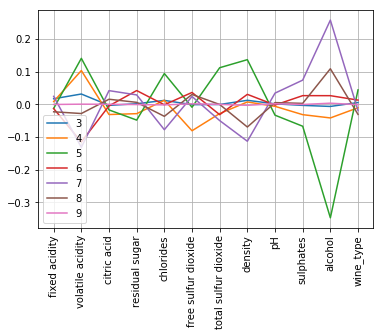

In [11]:
# model coefficient
df = pd.DataFrame(data=clf.coef_, columns=feature.columns.tolist(), index=range(3,10)).transpose()
df.plot(grid=True, xticks=range(0,12), rot=90, kind='line')

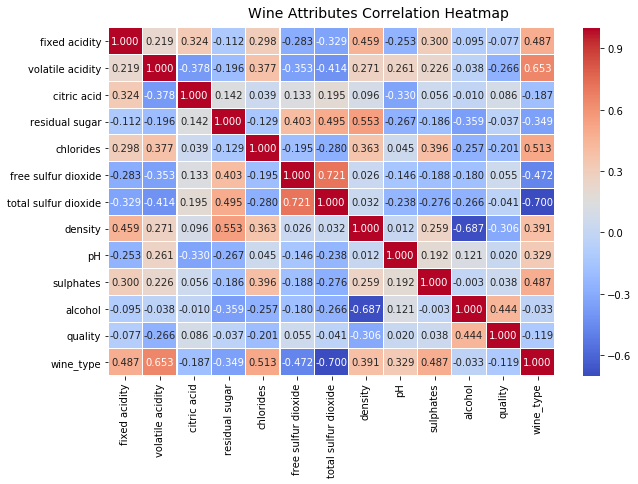

In [12]:
# correlation heat-map 
import seaborn as sns
f, ax = plt.subplots(figsize=(10,6))
corr = wines.corr()

# heatmap
hm = sns.heatmap(
     round(corr,3),
    annot=True,
    ax=ax,
    cmap='coolwarm',
    fmt='.3f',
    linewidths=.05
)

f.subplots_adjust(top=0.93)
t = f.suptitle(
    'Wine Attributes Correlation Heatmap', 
    fontsize=14
)

## Conclusion
- accuracy is low, 0.5241 need more data or do feature engineering